In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import datetime

Adding gold etf

In [2]:
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [3]:
apple = pdr.get_data_yahoo('AAPL', start='2015-01-01', end=datetime.datetime.today())
apple.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-05,195.399994,196.899994,194.869995,195.869995,195.869995,54156800
2024-06-06,195.690002,196.500000,194.169998,194.479996,194.479996,41181800
2024-06-07,194.649994,196.940002,194.139999,196.889999,196.889999,53103900
2024-06-10,196.899994,197.300003,192.149994,193.119995,193.119995,97262100
2024-06-12,207.360001,215.990005,206.910004,214.940002,214.940002,58406006


Adding a day column.

In [4]:
day = np.arange(1, len(apple)+1)
apple['day'] = day

In [5]:
apple=apple.drop(columns=['Adj Close', 'Volume'])

Rearranging the columns

In [6]:
apple = apple[['day', 'Open', 'High', 'Low', 'Close']]

In [7]:
apple['9-day'] = apple['Close'].rolling(9).mean().shift()
apple['21-day'] = apple['Close'].rolling(21).mean().shift()
apple[20:25]

,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2015-02-02,21,29.512501,29.792500,29.020000,29.657499,28.257222,NaN
2015-02-03,22,29.625000,29.772499,29.402500,29.662500,28.532500,27.755476
2015-02-04,23,29.625000,30.127501,29.577499,29.889999,28.785278,27.866429
2015-02-05,24,30.004999,30.057501,29.812500,29.985001,28.984167,28.024881
2015-02-06,25,30.004999,30.062500,29.612499,29.732500,29.177500,28.187738


In [8]:
apple['signal'] = np.where(apple['9-day'] > apple['21-day'], 1, 0)
apple['signal'] = np.where(apple['9-day'] < apple['21-day'], -1, apple['signal'])
apple.dropna(inplace=True)
apple

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2015-02-03,22,29.625000,29.772499,29.402500,29.662500,28.532500,27.755476,1
2015-02-04,23,29.625000,30.127501,29.577499,29.889999,28.785278,27.866429,1
2015-02-05,24,30.004999,30.057501,29.812500,29.985001,28.984167,28.024881,1
2015-02-06,25,30.004999,30.062500,29.612499,29.732500,29.177500,28.187738,1
2015-02-09,26,29.637501,29.959999,29.607500,29.930000,29.339444,28.320833,1
...,...,...,...,...,...,...,...,...
2024-06-05,2372,195.399994,196.899994,194.869995,195.869995,191.106666,188.617142,1
2024-06-06,2373,195.690002,196.500000,194.169998,194.479996,191.658888,189.291428,1
2024-06-07,2374,194.649994,196.940002,194.139999,196.889999,192.503332,189.866666,1


In [9]:
apple['return'] = np.log(apple['Close']).diff()
apple['system_return'] = apple['signal'] * apple['return']
apple['entry'] = apple['signal'].diff()

In [10]:
apple

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2015-02-03,22,29.625000,29.772499,29.402500,29.662500,28.532500,27.755476,1,NaN,NaN,NaN
2015-02-04,23,29.625000,30.127501,29.577499,29.889999,28.785278,27.866429,1,0.007640,0.007640,0.0
2015-02-05,24,30.004999,30.057501,29.812500,29.985001,28.984167,28.024881,1,0.003173,0.003173,0.0
2015-02-06,25,30.004999,30.062500,29.612499,29.732500,29.177500,28.187738,1,-0.008457,-0.008457,0.0
2015-02-09,26,29.637501,29.959999,29.607500,29.930000,29.339444,28.320833,1,0.006621,0.006621,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-05,2372,195.399994,196.899994,194.869995,195.869995,191.106666,188.617142,1,0.007790,0.007790,0.0
2024-06-06,2373,195.690002,196.500000,194.169998,194.479996,191.658888,189.291428,1,-0.007122,-0.007122,0.0
2024-06-07,2374,194.649994,196.940002,194.139999,196.889999,192.503332,189.866666,1,0.012316,0.012316,0.0


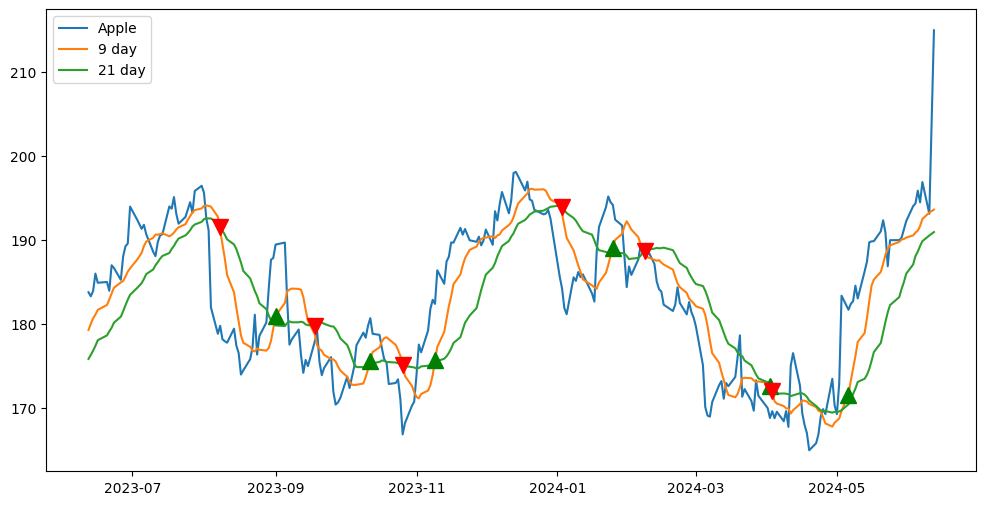

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(apple['Close'][-252:], label='Apple')
plt.plot(apple['9-day'][-252:], label='9 day')
plt.plot(apple['21-day'][-252:], label='21 day')
plt.plot(apple[-252:].loc[apple.entry==2].index, apple[-252:]['9-day'][apple.entry==2], '^', color='g', markersize=12)
plt.plot(apple[-252:].loc[apple.entry==-2].index, apple[-252:]['21-day'][apple.entry==-2], 'v', color='r', markersize=12)
plt.legend(loc=2)

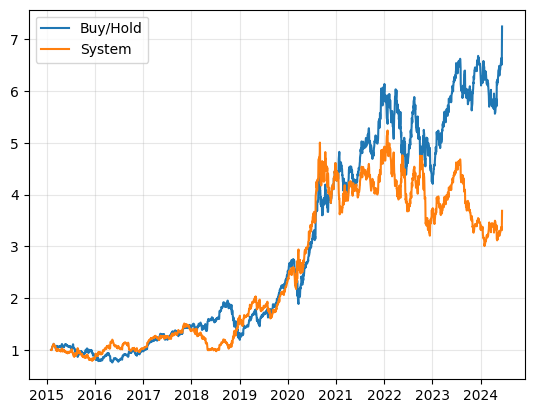

In [12]:
plt.plot(np.exp(apple['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(apple['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [13]:
np.exp(apple['return']).cumprod().iloc[-1]-1

6.246186251233243

In [14]:
np.exp(apple['system_return']).cumprod().iloc[-1]-1

2.6883811148599928

In [20]:
apple_weekly = apple.resample('W').mean()

In [21]:
apple_weekly

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2015-02-08,23.5,29.815000,30.005000,29.601250,29.817500,28.869861,27.958631,1.0,0.000786,0.000786,0.0
2015-02-15,28.0,30.741500,31.083500,30.615500,31.008000,29.804500,28.580000,1.0,0.013256,0.013256,0.0
2015-02-22,32.5,32.013749,32.261875,31.921875,32.156250,30.856458,29.499941,1.0,0.004716,0.004716,0.0
2015-03-01,37.0,32.665500,32.982001,32.191500,32.642000,32.048055,30.570071,1.0,-0.001613,-0.001613,0.0
2015-03-08,42.0,32.214500,32.374000,31.836501,32.000000,32.448611,31.431643,1.0,-0.002917,-0.002917,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-19,2358.0,188.167999,189.592001,187.423996,188.627997,182.457335,174.892953,1.0,0.007316,0.007316,0.0
2024-05-26,2363.0,190.498001,191.810001,188.973999,190.229999,187.986221,180.143334,1.0,0.000116,0.000116,0.0
2024-06-02,2367.5,190.829998,192.500000,189.787502,190.954998,190.064165,184.607262,1.0,0.002969,0.002969,0.0
